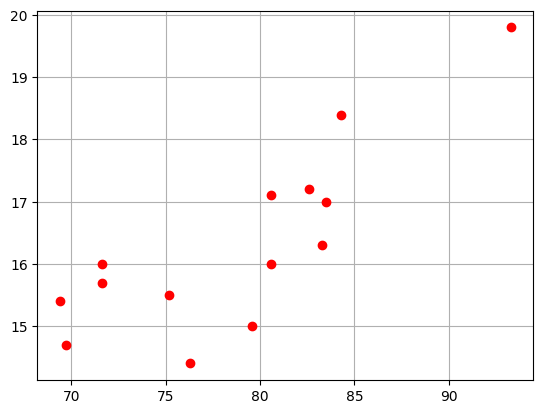

J= [[134.21035714]]


ValueError: shapes (2,) and (1,) not aligned: 2 (dim 0) != 1 (dim 0)

In [32]:
import numpy as np
import matplotlib.pyplot as plt


def compute_cost(X, y, theta):
    """

    """
    m = y.shape[0]
    z = np.dot(X, theta) - y
    J = 1/(2*m) * np.dot(z.T, z)
    return J


def gradiant_decend_online(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    k = 0
    J_iter = np.zeros((num_iters*m))
    for j in range(num_iters):
        rank_index = np.random.permutation(m)
        for i in range(m):
            x_i = X[rank_index[i],:]
            y_i = y[rank_index[i]]
            theta = theta - alpha * (np.dot(x_i, theta.T) - y_i) * x_i.T 
            J = compute_cost(x_i, y_i, theta)
            J_iter[k] = J
            k += 1
    return theta, J_iter



# load 'Cricket.npz`

data = np.load('Cricket.npz') # load the data

yx = data['arr_0'] 

yx.shape

x = yx[:,1]
y = yx[:,0]
m = y.shape[0]
plt.plot(x,y,'ro')
plt.grid(axis='both')
plt.show()

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)
ones_vector = np.ones((m, 1))

X = np.concatenate((ones_vector, x), axis=1) # add a column of ones to x (intercept)

theta = np.zeros((X.shape[1], 1)) # initialize fitting parameters (theta)

J = compute_cost(X, y, theta) # compute initial cost (J)

print('J=',J)
alpha = 0.01
num_iters = 180

theta, J_iter = gradiant_decend_online(X, y, theta, alpha, num_iters)
